In [1]:
import os
import json
import pandas as pd
from src.gender import gender
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())

In [2]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")
hcf = hcf[hcf["Typologie"] == "hraný"]

## Herectvo

In [3]:
hcf = hcf[["Film","Copyright","Režie","Scénář","Původní filmový námět","Hrají","Typologie"]]

In [4]:
def hlrole(x):
    try:
        x = x[0]
    except:
        x = x
    return x

In [5]:
hcf["Hlavní role"] = hcf["Hrají"].apply(lambda x: hlrole(x))

In [6]:
hcf["Gender hlavní role"] = hcf["Hlavní role"].apply(lambda x: gender(x))

In [7]:
hcf[["Film","Hlavní role","Gender hlavní role"]].sample(5)

,Film,Hlavní role,Gender hlavní role
1388,Jan Hus (396186),Zdeněk Štěpánek (87457),muž
2817,„Babičky dobíjejte přesně!“ (397426),Jiří Lábus (838),muž
2600,Tajemství Ocelového města (397185),Martin Růžek (4934),muž
3813,Tady hlídám já (184136),Vladimír Javorský (1421),muž
2767,Vítr v kapse (397370),Lukáš Vaculík (3864),muž


In [8]:
pomer_hl_roli = pd.Series(hcf[hcf["Gender hlavní role"] == "žena"].groupby("Copyright")["Hlavní role"].nunique() / hcf[(hcf["Gender hlavní role"] == "muž") | (hcf["Gender hlavní role"] == "žena")].groupby("Copyright")["Hlavní role"].nunique())

<AxesSubplot:xlabel='Copyright'>

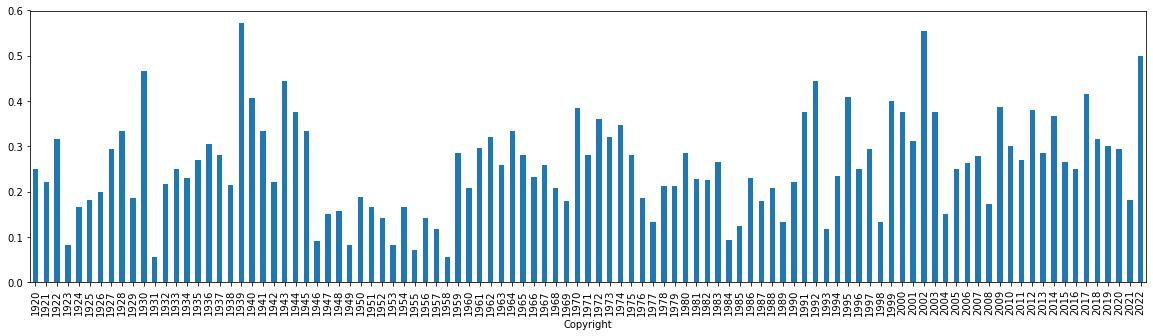

In [9]:
pomer_hl_roli.plot.bar(figsize=(20,5))

In [10]:
hcf = hcf.explode("Hrají")[["Film","Copyright","Režie","Hrají"]]

In [11]:
hcf["Gender"] = hcf["Hrají"].apply(lambda x: gender(x))

In [12]:
hcf[hcf["Gender"] == "žena"].groupby(["Copyright","Film"])["Hrají"].nunique().groupby("Copyright").sum()

Copyright
1920     27
1921     22
1922     39
1923     22
1924     30
       ... 
2018    180
2019    187
2020    134
2021    136
2022     16
Name: Hrají, Length: 103, dtype: int64

In [13]:
pomer_herecek = pd.Series(hcf[hcf["Gender"] == "žena"].groupby("Copyright")["Hrají"].nunique() / hcf[(hcf["Gender"] == "muž") | (hcf["Gender"] == "žena")].groupby("Copyright")["Hrají"].nunique())

In [14]:
pomer_herecek

Copyright
1920    0.259259
1921    0.260274
1922    0.239316
1923    0.208333
1924    0.228571
          ...   
2018    0.274131
2019    0.298893
2020    0.306701
2021    0.300532
2022    0.355556
Name: Hrají, Length: 103, dtype: float64

<AxesSubplot:xlabel='Copyright'>

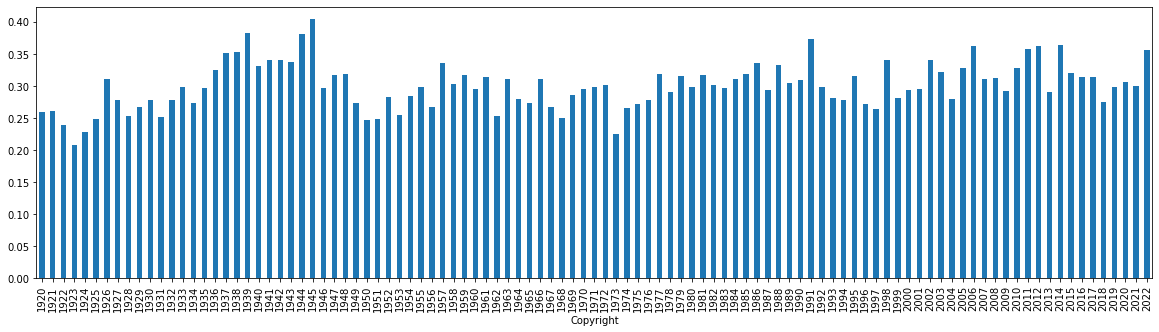

In [15]:
pomer_herecek.plot.bar(figsize=(20,5))

In [16]:
pomer_herecek = pd.Series(hcf[hcf["Gender"] == "žena"].groupby(["Copyright","Film"])["Hrají"].nunique().groupby("Copyright").sum() / hcf[(hcf["Gender"] == "muž") | (hcf["Gender"] == "žena")].groupby(["Copyright","Film"])["Hrají"].nunique().groupby("Copyright").sum(), name="Podíl hereček")

In [17]:
pomer_herecek

Copyright
1920    0.254717
1921    0.203704
1922    0.181395
1923    0.209524
1924    0.260870
          ...   
2018    0.282575
2019    0.287250
2020    0.297118
2021    0.311213
2022    0.355556
Name: Podíl hereček, Length: 103, dtype: float64

<AxesSubplot:xlabel='Copyright'>

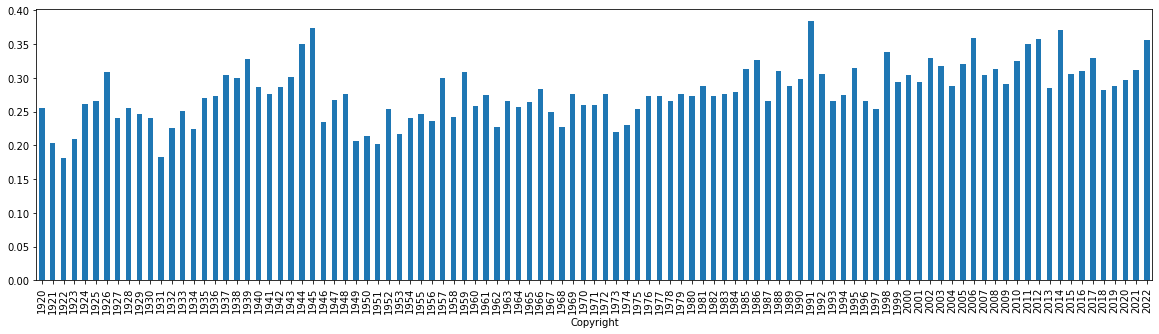

In [18]:
pomer_herecek.plot.bar(figsize=(20,5))

In [19]:
hcf[hcf["Gender"] == "žena"].groupby("Film")["Hrají"].nunique().sum() / hcf.groupby("Film")["Hrají"].nunique().sum()

0.28090075760746724

In [20]:
hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 1983) & (hcf["Copyright"] <= 2002)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum()

0.24404299404299404

In [21]:
hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 2003)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum()

0.3181818181818182

In [22]:
(hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 2003)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum() - hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 1983) & (hcf["Copyright"] <= 2002)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum()) / 20

0.003706941206941207

In [23]:
2023 + (0.5 - hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 2003)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum()) / ((hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 2003)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum() - hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 1983) & (hcf["Copyright"] <= 2002)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum()) / 20)

2072.048034934498

In [24]:
hcf[hcf["Gender"] == "muž"].groupby("Film")["Hrají"].nunique().nlargest()

Film
Osvobození Prahy (397108)       158
Dny zrady (396979)              130
Putování Jana Amose (397429)    121
Dvacátý devátý (397039)         117
Mazaný Filip (20319)            109
Name: Hrají, dtype: int64

In [25]:
hcf["Hrají"].nunique()

15360

In [26]:
hcf[hcf["Gender"] == "muž"]["Hrají"].nunique()

10553

In [27]:
hcf[hcf["Gender"] == "žena"]["Hrají"].nunique()

4807

## Herectvo

In [28]:
herectvo = pd.read_json(os.path.join("data", "herectvo.json"))

In [29]:
herectvo

,Jméno,Bio,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Titul,Film,Rok,Úloha,Role,Alternativní jména,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk
0,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Vratné lahve,Vratné lahve (23639),2007,Hrají,důchodce v parku,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,55.0
1,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Nejistá sezóna,Nejistá sezóna (397550),1987,Hrají,kulisák Honza Melichar,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,35.0
2,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Vesničko má středisková,Vesničko má středisková (397480),1985,Hrají,bagrista Ferda,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,33.0
3,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Rozpuštěný a vypuštěný,Rozpuštěný a vypuštěný (397438),1984,Hrají,agent Ziegler,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,32.0
4,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika","Jára Cimrman, ležící, spící","Jára Cimrman, ležící, spící (397423)",1983,Hrají,krajánek,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86646,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Straka v hrsti,Straka v hrsti (397595),1987,Hrají,čeledín,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,39.0
86647,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Rekord,Rekord (397357),1982,Hrají,chlapec,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,34.0
86648,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Opera ve vinici,Opera ve vinici (397330),1981,Hrají,přítel Jiří,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,33.0
86649,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Kalamita,Kalamita (397340),1980,Hrají,milenec,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,32.0


In [30]:
herectvo = herectvo.explode("Role")

In [31]:
herectvo[herectvo["Role"].str.lower().str.contains("princ",na=True)][["Jméno","Rok","Film","Role","Věk"]].sort_values(by="Věk",ascending=False).head(50)

,Jméno,Rok,Film,Role,Věk
62289,Ladislav Pešek (53326),1975,Prodaná nevěsta (397091),principál komediantů,69.0
48165,Marie Häusslerová (33648),1933,Pobočník Jeho Výsosti (395614),starší komorná princezny,67.0
48164,Marie Häusslerová (33648),1933,Pobočník Jeho Výsosti [německá verze] (395590),starší komorná princezny,67.0
58141,Martin Růžek (4934),1984,Komediant (397445),principál Fortunatus,66.0
52332,Theodor Pištěk (37366),1959,Princezna se zlatou hvězdou (396365),princův pobočník,64.0
80400,Harriet Walter (84392),2012,Královská aféra (182846),"Augusta, princezna z Walesu",62.0
26242,Antonín Bulík (130255),1938,Co se šeptá (395844),princ Lobkovic,60.0
41869,Ludmila Vostrčilová (27337),1978,Mladý muž a bílá velryba (397200),sekretářka Šprinclová,60.0
41841,Ludmila Vostrčilová (27337),1978,Mladý muž a bílá velryba (397200),sekretářka Šprinclová,60.0
47711,Radovan Lukavský (3301),1976,Malá mořská víla (397113),"král všech moří, otec šesti princezen",57.0


In [32]:
zanry = df[["Film","Žánr"]]

In [33]:
zanry

,Film,Žánr
0,Přenesení kolébky Františka Palackého z Hodsla...,reportáž
1,Cvičení s kužely Sokolů malostranských (401704),"[reportáž, sportovní]"
2,Cyklisté (401705),reportáž
3,Defilování vojska o Božím těle na Královských ...,reportáž
4,Hanácké banderium (401707),reportáž
...,...,...
4512,Mimořádná událost (402176),"[komedie, satira, bláznivá komedie]"
4513,Po čem muži touží 2 (402173),"[fantastický, komedie]"
4514,Až zařve lev (402204),"[historický, životopisný, esej]"
4515,Planeta Praha (402218),"[přírodopisný, rodinný]"


In [34]:
zanry.explode("Žánr").groupby("Žánr")["Film"].nunique().nlargest(50)

Žánr
komedie              978
drama                643
psychologický        412
příběh               229
povídka              228
reklamní             224
pohádka              216
dětský               188
historický           178
melodrama            164
dokument             133
kriminální           121
životopisný          113
hudební              112
etuda                110
satira                94
dobrodružný           91
hořká komedie         78
groteska              77
politický             76
povídkový             76
osvětový              71
reportáž              69
rodinný               69
sociální              68
detektivní            66
tragikomedie          61
umělecký              58
válečný               51
fantastický           47
thriller              47
medailon              43
sci-fi                43
smutná komedie        43
podobenství           42
poetický              42
road movie            42
časosběrný            42
esej                  40
propagační          

In [35]:
pohadky = ["pohádka","dětský","rodinný"]

In [36]:
herectvo = herectvo.merge(zanry, on="Film")

In [37]:
herectvo = herectvo.explode("Žánr")

In [38]:
herectvo[(herectvo["Role"].str.lower().str.contains("důchodce",na=True,regex=True))].groupby(["Jméno","Film","Role"])["Věk"].max().nsmallest(20)

Jméno                        Film                                 Role                                           
Lubomír Kostelka (841)       Přehlídce velím já! (396823)         invalidní důchodce Josef Rendl                     42.0
Josef Vinklář (4983)         Jakou barvu má láska (396997)        hlas důchodce Máchy                                43.0
Luděk Pilc (128781)          Nikdo se nebude smát (396650)        elegantní důchodce                                 43.0
Josef Somr (1054)            Evžen mezi námi (397316)             důchodce Koutný                                    47.0
Martin Finger (19835)        Zahradnictví: Nápadník (401672)      invalidní důchodce Jindřich Rohn, Vilmin manžel    47.0
Ondřej Malý (59148)          Učitelka (400766)                    invalidní důchodce Řehák                           50.0
Josef Koza (126437)          Zlá noc (396978)                     důchodce Kverka, výpomocný zámečník                52.0
Josef Burda (78901)          Jak

In [39]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().nlargest(20)

Jméno                      Film                                 Role                              
Jiří Maryško (81150)       Tajemství staré bambitky 2 (402174)  princ Oleandr, nápadník               41.0
Petr Hanuš (3548)          Třetí princ (397364)                 princ na koni                         39.0
Vladimír Zoubek (125641)   O medvědu Ondřejovi (396371)         princ Vítek                           39.0
Miroslav Kalný (131466)    O medvědu Ondřejovi (396371)         princ nápadník                        37.0
Soběslav Sejk (9018)       O medvědu Ondřejovi (396371)         princ Hynek                           37.0
Miroslav Horníček (13266)  Byl jednou jeden král... (396193)    princ krásný, syn Alabastra XVI.      36.0
Václav Neužil (9101)       Sedmero krkavců (400594)             princ Norbert                         36.0
Jiří Bartoška (827)        Třetí princ (397364)                 princ Jindřich                        35.0
Ondřej Vetchý (836)        Kouzelný měšec (85

In [40]:
herectvo[(herectvo["Film"] == "Tajemství staré bambitky 2 (402174)")]

,Jméno,Bio,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Titul,Film,Rok,Úloha,Role,Alternativní jména,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk,Žánr
1321,Petr Koutecký (10038),None,1954,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Mluví,hlas kočího,None,None,None,None,None,1954.0,NaN,67.0,pohádka
1322,Otmar Brancuzský (1063),None,13.02.1956,"Jihlava, Československo",22.10.2022,"Malý Beranov u Jihlavy, Česká republika",Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,generál,None,Jihlava,Československo,Česká republika,Česká republika,1956.0,2022.0,65.0,pohádka
1323,Martin Hanuš (1080),None,14.11.1964,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,jezdec na koni/kočí/dubl,None,None,None,None,None,1964.0,NaN,57.0,pohádka
1324,Leoš Noha (16926),None,04.05.1968,"Ústí nad Labem, Československo",None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,sedlák Macháně,None,Ústí nad Labem,Československo,None,None,1968.0,NaN,53.0,pohádka
1325,Jan Šobor (17695),None,None,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,vesničan,None,None,None,None,None,NaN,NaN,NaN,pohádka
1326,Lucie Kožinová (17999),None,1969,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,Marie Švecová,None,None,None,None,None,1969.0,NaN,52.0,pohádka
1327,Dita Zábranská (22673),None,None,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,hostinská,None,None,None,None,None,NaN,NaN,NaN,pohádka
1328,Veronika Kubařová (26753),None,01.06.1987,"Rakovník, Československo",None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,"[Zpívá, Hrají]",královna Julie I.,"Veronika Khek (provdaná), Veronika Khek Kubařová",Rakovník,Československo,None,None,1987.0,NaN,34.0,pohádka
1329,Veronika Kubařová (26753),None,01.06.1987,"Rakovník, Československo",None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,"[Zpívá, Hrají]",královna Julie I.,"Veronika Khek (provdaná), Veronika Khek Kubařová",Rakovník,Československo,None,None,1987.0,NaN,34.0,pohádka
1330,Matěj Merunka (35802),None,None,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,lesní adjunkt,None,None,None,None,None,NaN,NaN,NaN,pohádka


In [41]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().median()

29.0

In [42]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().mean()

28.65

In [43]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().nlargest(20)

Jméno                      Film                                    Role                                
Jitka Ježková (5336)       O princezně, která se nesmála (179679)  princezna                               33.0
Stella Májová (67287)      Byl jednou jeden král... (396193)       princezna Zpěvanka                      31.0
Jorga Kotrbová (125595)    Honza málem králem (397135)             princezna                               30.0
Květa Fialová (5338)       Princezna se zlatou hvězdou (396365)    princezna Florindella                   30.0
Irena Kačírková (81377)    Byl jednou jeden král... (396193)       princezna Drahomíra                     29.0
Libuše Šafránková (2272)   Třetí princ (397364)                    princezna Milena/princezna ze skal      29.0
Sabina Laurinová (3857)    Z pekla štěstí 2 (1201)                 princezna Eufrozína                     29.0
Vlasta Fialová (5062)      Legenda o lásce (396257)                princezna Mechmene Banu                 28.0


In [44]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().median()

22.5

In [45]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().mean()

22.65

In [46]:
herectvo.groupby("Jméno")["Věk"].max().nlargest()

Jméno
Jaroslav Hilbert (63466)      108.0
František Kovářík (126912)    104.0
Zdeněk Procházka (127279)     100.0
Zita Kabátová (839)            96.0
Miroslav Mráz (125568)         95.0
Name: Věk, dtype: float64

In [47]:
herectvo["Gender"] = herectvo["Jméno"].apply(lambda x: gender(x))

In [48]:
vyplneno = pd.Series(herectvo.groupby("Jméno")["Rok narození"].first(), name="vyplneno")
print(vyplneno[~vyplneno.isnull()].index.nunique())
print((vyplneno[vyplneno.isnull()].index.nunique()))

6336
5779


In [49]:
distribuce = pd.DataFrame(herectvo.groupby(["Film","Rok","Jméno","Věk","Gender"])["Rok úmrtí"].first().reset_index())

In [50]:
distribuce[distribuce["Rok úmrtí"].isnull()]

,Film,Rok,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
5,"...A bílá bledla, až celkem ztmavla (397394)",1983,Martin Kubala (714),25.0,muž,NaN
...,...,...,...,...,...,...
65756,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Karel Vítek (126651),34.0,muž,NaN
65757,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Kateřina Frýbová (88894),21.0,žena,NaN
65758,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Ladislav Mrnka (126577),47.0,muž,NaN
65765,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Nora Krčmářová (128785),45.0,žena,NaN


In [51]:
distribuce

,Film,Rok,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
2,"...A bílá bledla, až celkem ztmavla (397394)",1983,Karel Hovorka (76534),59.0,muž,1988.0
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
...,...,...,...,...,...,...
65774,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Vlastimil Hašek (35693),42.0,muž,1992.0
65775,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Blažek (126904),48.0,muž,1984.0
65776,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Kryzánek (81388),50.0,muž,1975.0
65777,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Srstka (7960),35.0,muž,2019.0


In [52]:
distribuce = distribuce[(distribuce["Rok úmrtí"] >= (distribuce["Rok"] + 2)) | (distribuce["Rok úmrtí"].isnull())]

In [53]:
distribuce

,Film,Rok,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
2,"...A bílá bledla, až celkem ztmavla (397394)",1983,Karel Hovorka (76534),59.0,muž,1988.0
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
...,...,...,...,...,...,...
65774,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Vlastimil Hašek (35693),42.0,muž,1992.0
65775,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Blažek (126904),48.0,muž,1984.0
65776,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Kryzánek (81388),50.0,muž,1975.0
65777,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Srstka (7960),35.0,muž,2019.0


In [54]:
distribuce[distribuce["Film"] == "Vlastníci (402008)"]

,Film,Rok,Jméno,Věk,Gender,Rok úmrtí
55805,Vlastníci (402008),2019,Andrej Polák (10913),40.0,muž,NaN
55806,Vlastníci (402008),2019,Dagmar Havlová (76136),68.0,žena,NaN
55807,Vlastníci (402008),2019,David Novotný (1834),50.0,muž,NaN
55808,Vlastníci (402008),2019,Halka Třešňáková (24197),47.0,žena,NaN
55809,Vlastníci (402008),2019,Jiří Lábus (838),69.0,muž,NaN
55810,Vlastníci (402008),2019,Jiří Černý (13756),37.0,muž,NaN
55811,Vlastníci (402008),2019,Klára Melíšková (13764),48.0,žena,NaN
55812,Vlastníci (402008),2019,Kryštof Hádek (1830),37.0,muž,NaN
55813,Vlastníci (402008),2019,Ladislav Trojan (10040),87.0,muž,2022.0
55814,Vlastníci (402008),2019,Ondřej Malý (59148),53.0,muž,NaN


In [55]:
distribuce.groupby("Film")["Věk"].mean().nlargest(10)

Film
Pomalu, ale slábnu (78814)                      86.500000
Panenství Lídy Baarové (400756)                 83.000000
Rosa & Dara: Co je to gravitace? (400674)       81.000000
Rosa & Dara: Jak velké jsou hvězdy? (400676)    81.000000
Rosa & Dara: Proč prší? (400672)                81.000000
Kouzelná skříň (397535)                         73.000000
Pamětnice (123955)                              72.266667
Pátá loď (401180)                               72.000000
Odborný dohled nad výkladem snu (401766)        71.750000
Až zařve lev (402204)                           70.333333
Name: Věk, dtype: float64

In [56]:
distribuce.groupby("Film")["Věk"].mean().nsmallest(10)

Film
Červená Karkulka (402180)                5.0
Potkal jsem ho v zoo (397759)           11.0
Psí historie (117009)                   11.5
Malý sen (396231)                       13.0
Školní úkol [německá verze] (401193)    13.0
Cesta do pravěku (396218)               14.4
Československý Ježíšek (395161)         15.0
Černý démant (398743)                   15.4
Jak Vašíček přišel k nohám (395247)     17.0
Kino (396465)                           17.0
Name: Věk, dtype: float64

<AxesSubplot:ylabel='Frequency'>

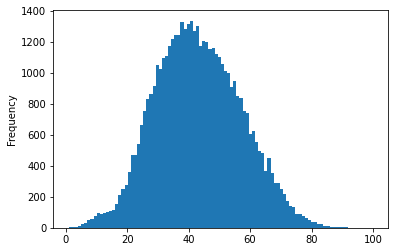

In [57]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].plot.hist(bins=98)

<AxesSubplot:ylabel='Frequency'>

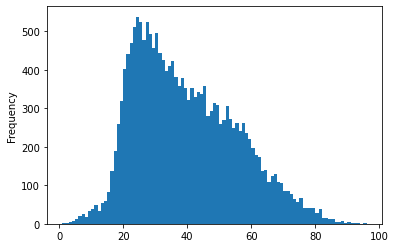

In [58]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].plot.hist(bins=95)

In [59]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].median()

43.0

In [60]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].median()

36.0

In [61]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].mode()

0    41.0
Name: Věk, dtype: float64

In [62]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].mode()

0    24.0
Name: Věk, dtype: float64

In [63]:
distribuce[(distribuce["Rok"] >= 2003) & (distribuce["Gender"] == "muž")]["Věk"].median()

46.0

In [64]:
distribuce[(distribuce["Rok"] >= 2003) & (distribuce["Gender"] == "žena")]["Věk"].median()

41.0

<AxesSubplot:ylabel='Frequency'>

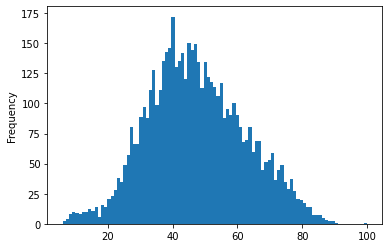

In [65]:
distribuce[(distribuce["Rok"] >= 2003) & (distribuce["Gender"] == "muž")]["Věk"].plot.hist(bins=95)

<AxesSubplot:ylabel='Frequency'>

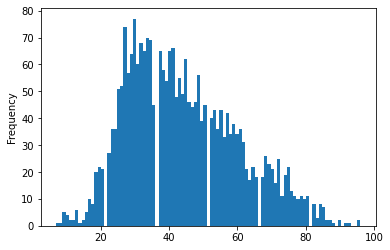

In [66]:
distribuce[(distribuce["Rok"] >= 2003) & (distribuce["Gender"] == "žena")]["Věk"].plot.hist(bins=95)

## Režisérstvo

In [67]:
reziserstvo = df[["Copyright","Typologie","Délka","Žánr","Film","Režie"]]

In [68]:
reziserstvo = reziserstvo.explode("Režie").explode("Typologie").explode("Délka")

In [69]:
reziserstvo["Gender"] = reziserstvo["Režie"].apply(lambda x: gender (x))

In [70]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Copyright"] >= 2003)]

,Copyright,Typologie,Délka,Žánr,Film,Režie,Gender
3458,2003,animovaný,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
3458,2003,distribuční,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
3458,2003,studentský,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
3459,2003,dokumentární,dlouhometrážní,dokument,Ničeho nelituji (26300),Theodora Remundová (5425),žena
3459,2003,distribuční,dlouhometrážní,dokument,Ničeho nelituji (26300),Theodora Remundová (5425),žena
...,...,...,...,...,...,...,...
4499,2021,distribuční,dlouhometrážní,"[sociální, životopisný]",Moje slunce Mad (402175),Michaela Pavlátová (6866),žena
4500,2021,animovaný,dlouhometrážní,"[dobrodružný, rodinný]",Myši patří do nebe (402168),Alice Hurychová (81624),žena
4500,2021,distribuční,dlouhometrážní,"[dobrodružný, rodinný]",Myši patří do nebe (402168),Alice Hurychová (81624),žena
4516,2022,dokumentární,dlouhometrážní,medailon,Identita ES (402166),Alena Činčerová (5732),žena


In [71]:
reziserstvo[(reziserstvo["Gender"] == "žena")]["Film"].nunique() / reziserstvo["Film"].nunique()

0.09776102859676347

In [72]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný")]["Film"].nunique() / reziserstvo[(reziserstvo["Typologie"] == "hraný")]["Film"].nunique()

0.05486425339366516

In [73]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Copyright"] >= 2003)]["Film"].nunique() / reziserstvo[(reziserstvo["Copyright"] >= 2003)]["Film"].nunique()

0.22045028142589118

In [74]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný") & (reziserstvo["Copyright"] >= 2003)]["Film"].nunique() / reziserstvo[(reziserstvo["Copyright"] >= 2003) & (reziserstvo["Typologie"] == "hraný")]["Film"].nunique()

0.14038128249566725

<AxesSubplot:xlabel='Copyright'>

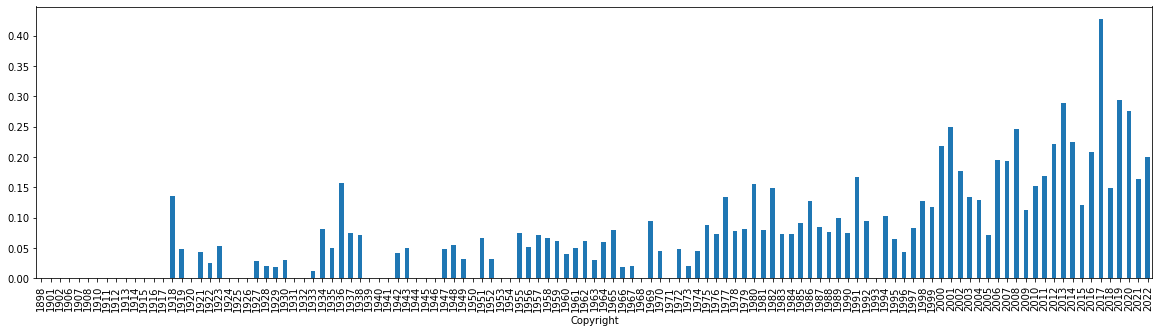

In [75]:
pomer_reziserek = pd.Series(reziserstvo[reziserstvo["Gender"] == "žena"].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo.groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

<AxesSubplot:xlabel='Copyright'>

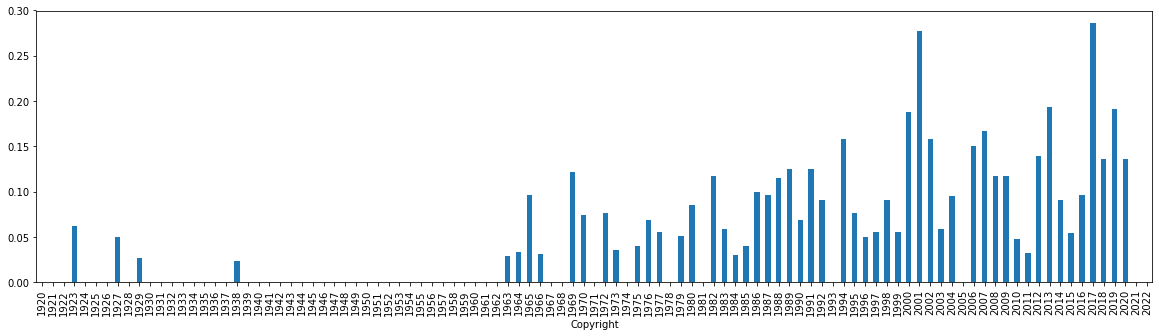

In [76]:
pomer_reziserek = pd.Series(reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo[(reziserstvo["Typologie"] == "hraný") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

In [77]:
reziserstvo[reziserstvo["Gender"] == "žena"].groupby("Režie")[["Copyright","Film","Typologie"]].min().sort_values(by="Copyright")

,Copyright,Film,Typologie
Režie,,,
Olga Rautenkranzová (80115),1918,Kozlonoh (395165),distribuční
Hedvika Raabeová (124236),1918,Praha roku 1549 (395171),distribuční
Thea Červenková (73006),1919,Babička (395236),distribuční
Květoslava Semonická (128168),1927,Ve spárech upíra (395423),distribuční
Hermína Týrlová (4754),1928,Co jim schází? (398629),animovaný
...,...,...,...
Olga Malířová Špátová (2267),2020,Karel (402130),distribuční
Vera Lacková (105595),2021,Jak jsem se stala partyzánkou (402160),distribuční
Adéla Špaljová (3107),2021,Nebe (402085),distribuční


In [78]:
typy = reziserstvo["Typologie"].drop_duplicates().to_list()

In [79]:
for t in typy:
    try:
        muzi = reziserstvo[(reziserstvo["Copyright"] >= 2003) & (reziserstvo["Typologie"] == t)].groupby("Gender")["Film"].nunique().iloc[0]
        zeny = reziserstvo[(reziserstvo["Copyright"] >= 2003) & (reziserstvo["Typologie"] == t)].groupby("Gender")["Film"].nunique().iloc[1]
        print(f"""{t}: {zeny/(zeny+muzi)}, m: {muzi}, ž: {zeny}""")
    except:
        print(f"""{t}: m: {muzi}, ž: {zeny}""")

dokumentární: 0.29945054945054944, m: 255, ž: 109
distribuční: 0.21880819366852886, m: 839, ž: 235
hraný: 0.13917525773195877, m: 501, ž: 81
animovaný: 0.3533834586466165, m: 86, ž: 47
studentský: 0.4727272727272727, m: 58, ž: 52
nedistribuční: m: 2, ž: 52
středometrážní: m: 2, ž: 52
krátkometrážní: 0.3, m: 7, ž: 3


<AxesSubplot:xlabel='Copyright'>

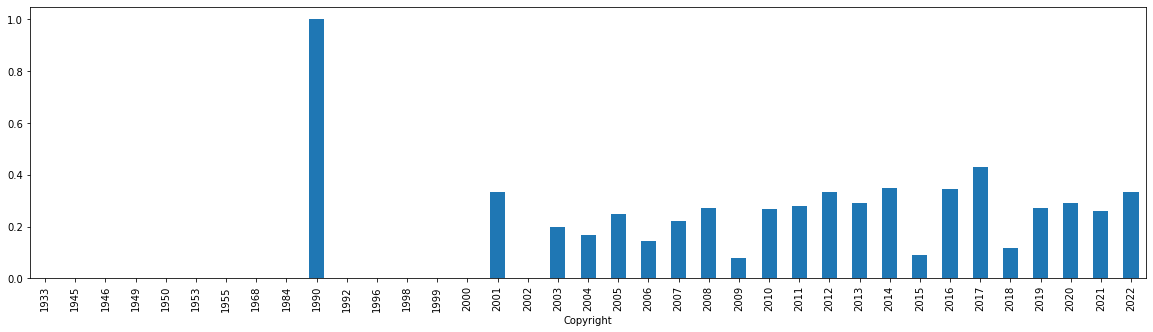

In [80]:
pomer_reziserek = pd.Series(reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo[(reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

<AxesSubplot:xlabel='Copyright'>

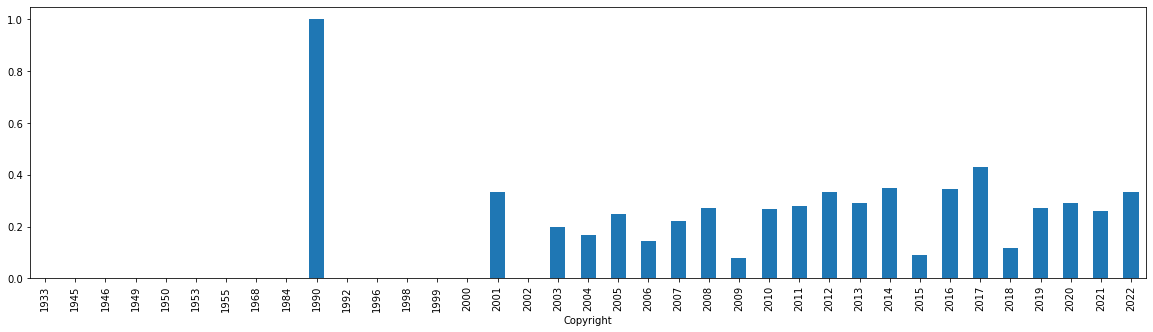

In [81]:
pomer_reziserek = pd.Series(reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo[(reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

In [82]:
reziserstvo.groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum()

Copyright
1898     18
1901      2
1902      2
1906      3
1907      2
       ... 
2018     87
2019    102
2020     58
2021     49
2022      5
Name: Film, Length: 119, dtype: int64

## Různé profese

In [87]:
df["Vedoucí produkce"].drop_duplicates().to_list()

[None,
 'Václav Eisenhamer (3534)',
 'Pavel Šolc (5420)',
 'Pavel Nový (4450)',
 'Jaromír Lukáš (27426)',
 'Jiří Ježek (4473)',
 ['Lucie Hertlová (74907)', 'Viktor Mayer (3334)'],
 'Daniela Stašková (34813)',
 ['Daniela Stašková (34813)', 'Zdenka Deitchová (1143)'],
 'Šárka Cimbalová (85990)',
 'Jana Novosadová (vedoucí natáčení)',
 'Jaroslav Kučera (vedoucí natáčení)',
 'Ivan Filus (9671)',
 'Luboš Tůma (9232)',
 'Markéta Hájková (2388)',
 'Jindřich Bareš (7470)',
 'Ivana Jaroschy (3246)',
 'Antonín Suchánek (12599)',
 ['Zdenka Fialová (6996)', 'Vladimír Kořínek (2106)'],
 ['Aleš Novák (644)', 'Ivan Nagy (34483)'],
 'Ingrid Klímová (147)',
 'Michaela Jarošová (1349)',
 'Pavla Tomsová (7093)',
 'Josef Nepovím (7697)',
 'Ľuboslav Žiško (2808)',
 'Jiřina Bílá (6711)',
 ['Martin Kořínek (1768)', 'Jo Farr (1769)'],
 'Radmila Haertová',
 'Adam Polák (2507)',
 'Hana Bílá (4013)',
 'Alexej Guha (658)',
 'Ivan Nagy (34483)',
 'Aleš Novák (644)',
 ['Libor Zlomek (3007)', 'Alexej Guha (658)'],
 

In [83]:
profesni_pomery = {}
for p in seznamy["profese"]:
    df_pracovni = df[["Film","Copyright",p]].explode(p)
    df_pracovni = df_pracovni[~df_pracovni[p].isin(opravy["nejsou_lide"])]
    df_pracovni["Gender profese"] = df_pracovni[p].apply(lambda x: gender(x))
    profesni_pomery[p] = [df_pracovni.groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "muž"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum() / df_pracovni.groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "muž"]["Copyright"].min(), df_pracovni[df_pracovni["Gender profese"] == "žena"]["Copyright"].min()]
profesni_pomery = pd.DataFrame.from_dict(profesni_pomery).transpose().rename(columns={0: "Celkem", 1: "Mužů", 2: "Žen", 3: "Podíl žen", 4: "První muž", 5: "První žena"})
profesni_pomery.sort_values(by="Podíl žen",ascending=False)

,Celkem,Mužů,Žen,Podíl žen,První muž,První žena
Skript,1085.0,40.0,1045.0,0.963134,1944.0,1938.0
Asistent střihu,1107.0,145.0,962.0,0.869015,1945.0,1945.0
Kostýmy,1638.0,396.0,1242.0,0.758242,1931.0,1931.0
Zástupce vedoucího produkce,320.0,90.0,230.0,0.718750,1991.0,1991.0
Návrhy kostýmů,2010.0,761.0,1249.0,0.621393,1922.0,1932.0
Asistent vedoucího produkce,281.0,109.0,172.0,0.612100,1993.0,1952.0
Produkce,927.0,500.0,427.0,0.460626,1935.0,1954.0
Masky,4843.0,2790.0,2053.0,0.423911,1926.0,1945.0
Vedoucí produkce,836.0,497.0,339.0,0.405502,1991.0,1993.0
Zástupce vedoucího výroby,2238.0,1470.0,767.0,0.342717,1931.0,1949.0


In [84]:
profesni_pomery20 = {}
for p in seznamy["profese"]:
    df_pracovni = df[df["Copyright"] >= 2003][["Film",p]].explode(p)
    df_pracovni = df_pracovni[~df_pracovni[p].isin(opravy["nejsou_lide"])]
    df_pracovni["Gender profese"] = df_pracovni[p].apply(lambda x: gender(x))
    profesni_pomery20[p] = [df_pracovni.groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "muž"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum() / df_pracovni.groupby("Film")[p].nunique().sum()]
profesni_pomery20 = pd.DataFrame.from_dict(profesni_pomery20).transpose().rename(columns={0: "Celkem", 1: "Mužů", 2: "Žen", 3: "Podíl žen"})
profesni_pomery20.sort_values(by="Podíl žen",ascending=False)

,Celkem,Mužů,Žen,Podíl žen
Skript,219.0,29.0,190.0,0.867580
Kostýmy,232.0,32.0,200.0,0.862069
Zástupce vedoucího produkce,274.0,67.0,207.0,0.755474
Návrhy kostýmů,593.0,146.0,447.0,0.753794
Masky,988.0,335.0,653.0,0.660931
Zástupce vedoucího výroby,104.0,39.0,65.0,0.625000
Asistent vedoucího produkce,264.0,102.0,162.0,0.613636
Produkce,786.0,392.0,394.0,0.501272
Vedoucí výroby,358.0,211.0,147.0,0.410615
Vedoucí produkce,782.0,461.0,321.0,0.410486


## Věk

(Moc to nevypovídá, u řady profesí je málo dat.)

In [85]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [86]:
vek20 = {}
for p in seznamy["profese"]:
    df_pracovni = df.explode("Typologie")
    df_pracovni = df_pracovni[(df_pracovni["Typologie"] == "hraný") & (df_pracovni["Délka"] == "dlouhometrážní")]
    df_pracovni = df_pracovni[df_pracovni["Copyright"] >= 2003][["Film","Copyright",p]].explode(p)
    df_pracovni = df_pracovni.merge(persony, left_on = p, right_on = "Jméno")
    df_pracovni["Věk"] = df_pracovni["Copyright"] - df_pracovni["Rok narození"]
    df_pracovni = df_pracovni[~(df_pracovni["Rok úmrtí"] < df_pracovni["Copyright"])]
    vek20[p] = [df_pracovni["Věk"].median(), df_pracovni["Věk"].mean().round(decimals = 1), df_pracovni["Věk"].min(), df_pracovni["Věk"].max()]
vek20 = pd.DataFrame.from_dict(vek20).transpose().rename(columns={0: "Průměrný věk", 1: "Medián", 2: "Nejnižší", 3: "Nejvyšší"})
vek20.sort_values(by="Medián",ascending=False)

,Průměrný věk,Medián,Nejnižší,Nejvyšší
Dramaturg,58.0,56.7,22.0,88.0
Pedagogické vedení,53.0,56.1,33.0,82.0
Skript,64.0,55.7,30.0,71.0
Masky,57.0,54.9,24.0,76.0
Odborný poradce,51.0,54.8,32.0,91.0
Koordinátor kaskadérů,55.0,53.4,27.0,72.0
Hudební režie,51.0,52.8,33.0,73.0
Autor projektu,58.0,52.3,41.0,58.0
Výtvarník,47.0,49.3,27.0,86.0
Kaskadéři,49.0,49.2,26.0,73.0
